In [228]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
# import csv file 
df = pd.read_csv("C:/Users/sachi/OneDrive/Documents/data science projects/Python_Diwali_Sales_Analysis/Diwali Sales Data.csv", encoding="unicode_escape")

In [232]:
df.shape

(11251, 15)

In [234]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


DATA CLEANING

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [239]:
# delete blank columns
df.drop(["Status","unnamed1"], axis=1, inplace=True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [243]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [245]:
# delete null values
df.dropna(inplace=True)

In [247]:
# check for null values again
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [249]:
# change data type of Amount to int
df["Amount"] = df["Amount"].astype("int64")

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [253]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [255]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


EXPLORATORY DATA ANALYSIS

GENDER

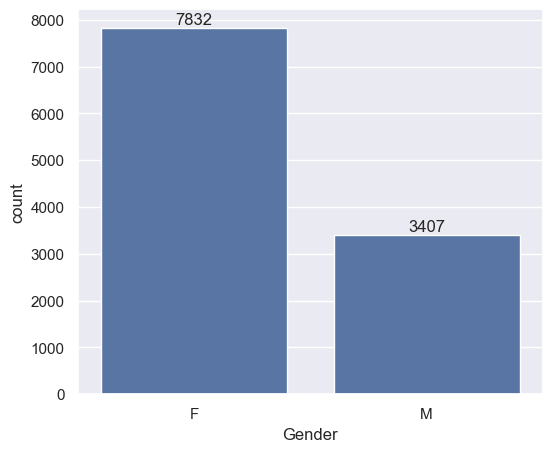

In [303]:
ge = sns.countplot(x = "Gender", data = df)
for bars in ge.containers:
    ge.bar_label(bars)
plt.show()

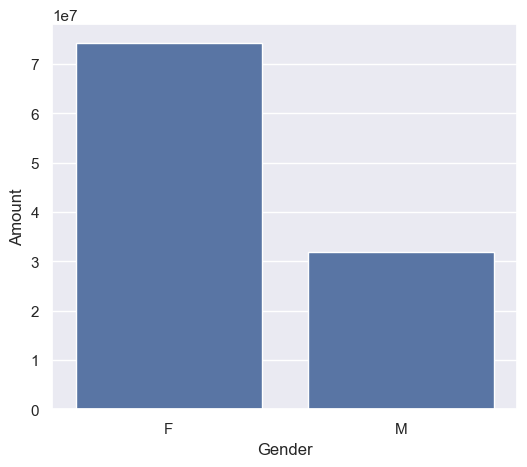

In [301]:
ga = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
gaa = sns.barplot(x="Gender", y="Amount", data=ga)
plt.show()

From the above graphs we can see that most of the buyers are females and even the purchasing power of female are greater than male

AGE

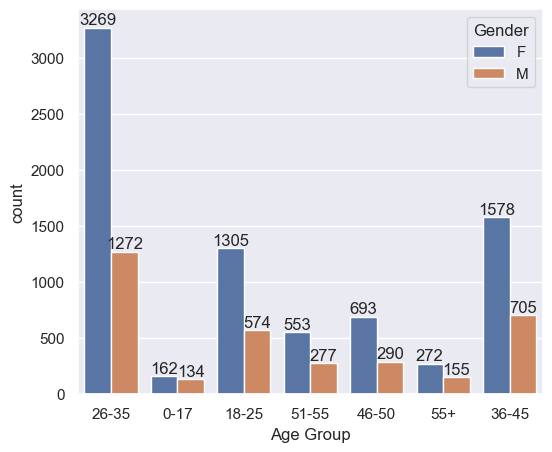

In [299]:
ag = sns.countplot(data=df, x="Age Group", hue="Gender")
for bars in ag.containers:
    ag.bar_label(bars)
plt.show()

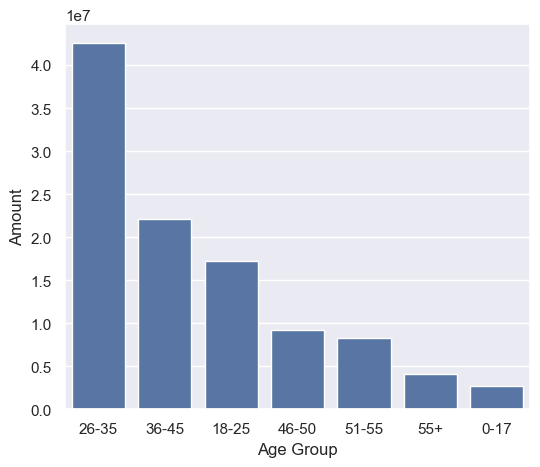

In [297]:
aa = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x="Age Group", y="Amount", data=aa)
plt.show()

From above graphs we can see that most of the buyers are of age group between 26-35 years female

STATE

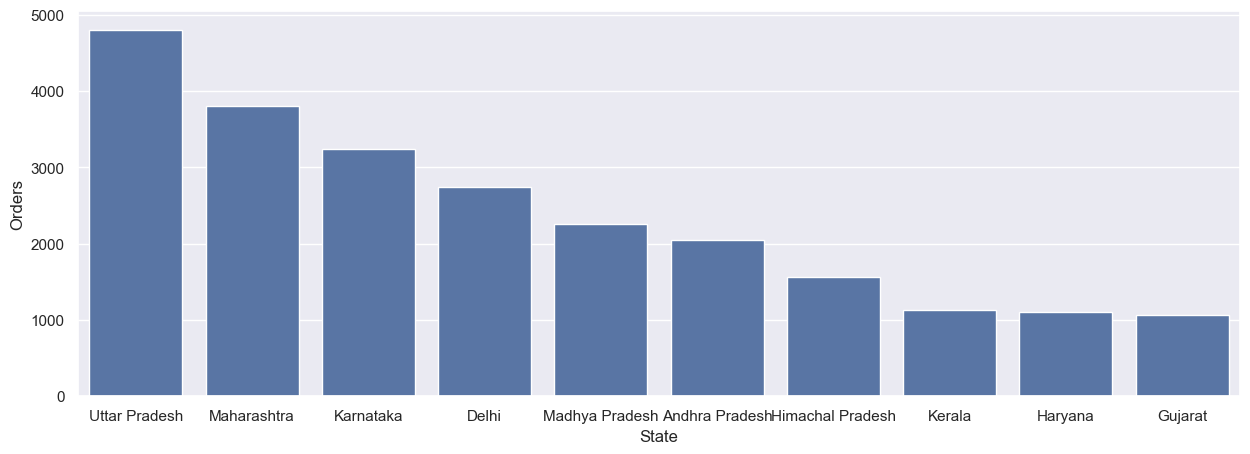

In [271]:
so = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(x="State", y="Orders", data=so)
plt.show()

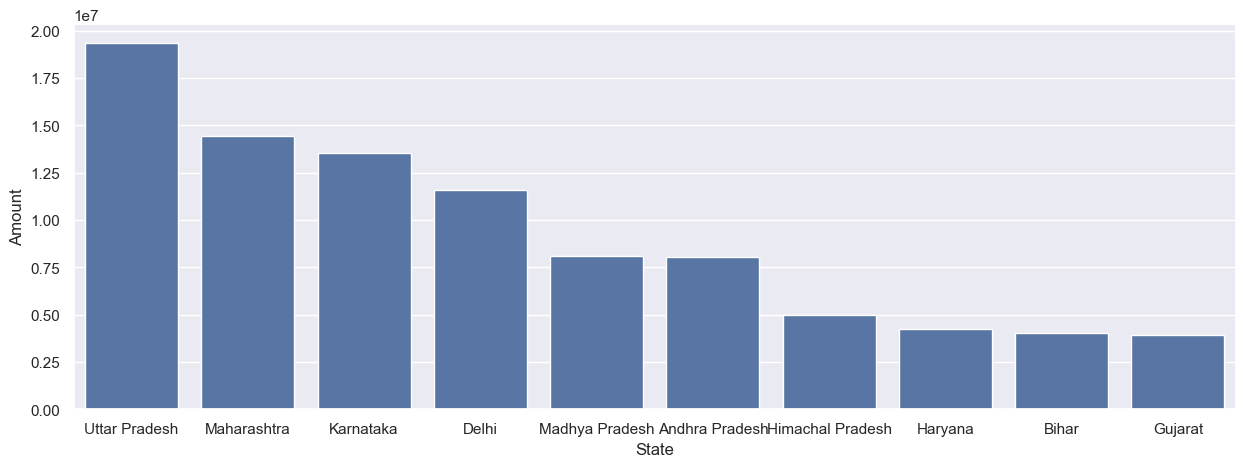

In [275]:
sa = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(x="State", y="Amount", data=sa)
plt.show()

From above graphs we can conclude that UP,Maharashtra and Karnatka are the top 3 contributers 

MARITAL STATUS

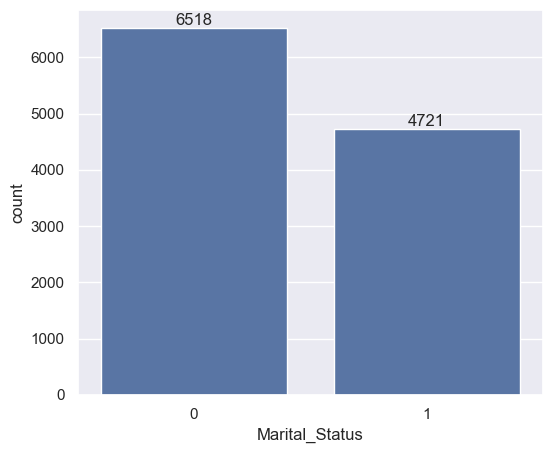

In [295]:
ms = sns.countplot(x="Marital_Status", data=df)
for bars in ms.containers:
    ms.bar_label(bars)
plt.show()

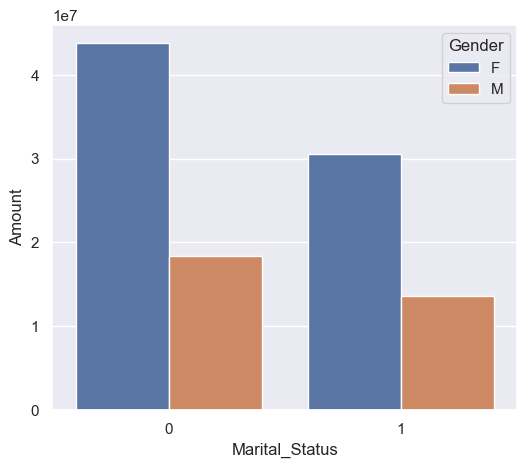

In [307]:
ma = df.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.set(rc={"figure.figsize":(6,5)})
sns.barplot(x="Marital_Status",y="Amount", data=ma, hue="Gender")
plt.show()

From above graphs we can conclude most no. of buyers are married female and they have high purchasing power

OCCUPATION

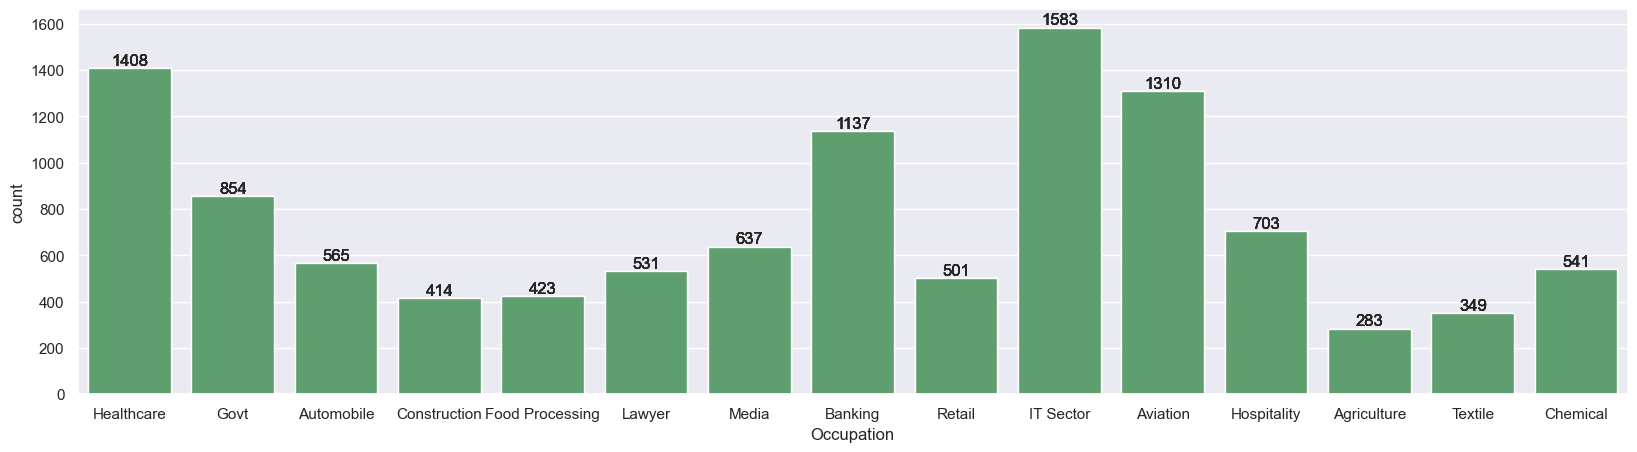

In [315]:
sns.set(rc={"figure.figsize":(20,5)})
oc = sns.countplot(x="Occupation", data=df)
for bars in oc.containers:
    oc.bar_label(bars)
plt.show()

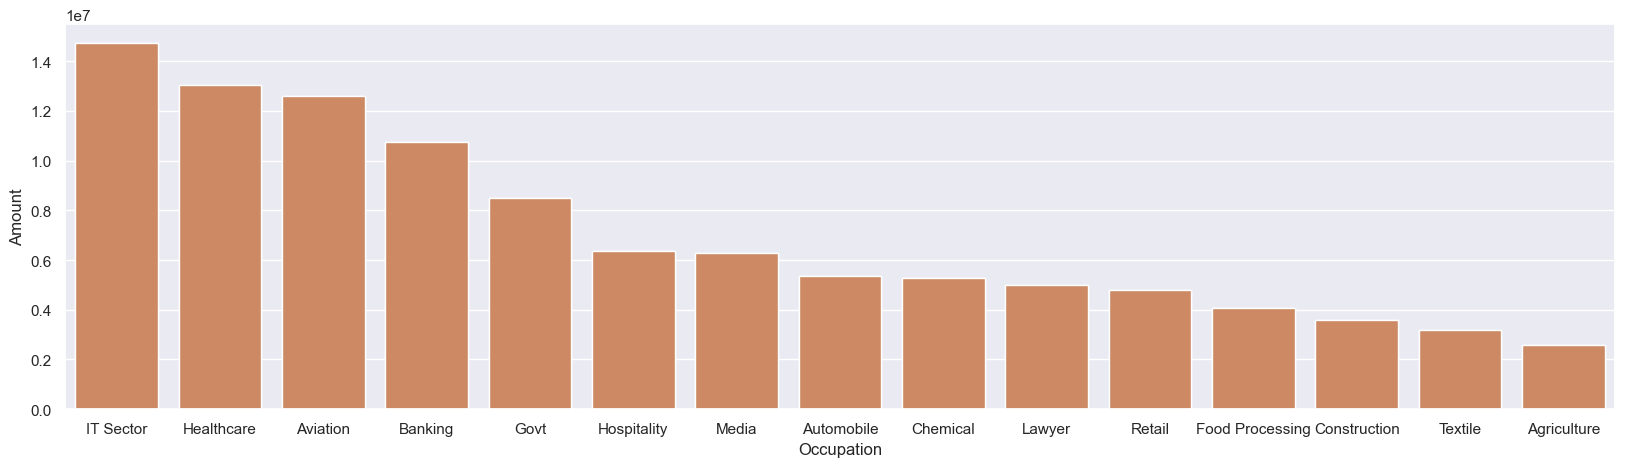

In [319]:
oa = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(x="Occupation", y="Amount", data=oa)
plt.show()

From above graphs we can conclude that top 3 buyers by sectors are IT,Healthcare and Aviation

PRODUCT CATEGORY

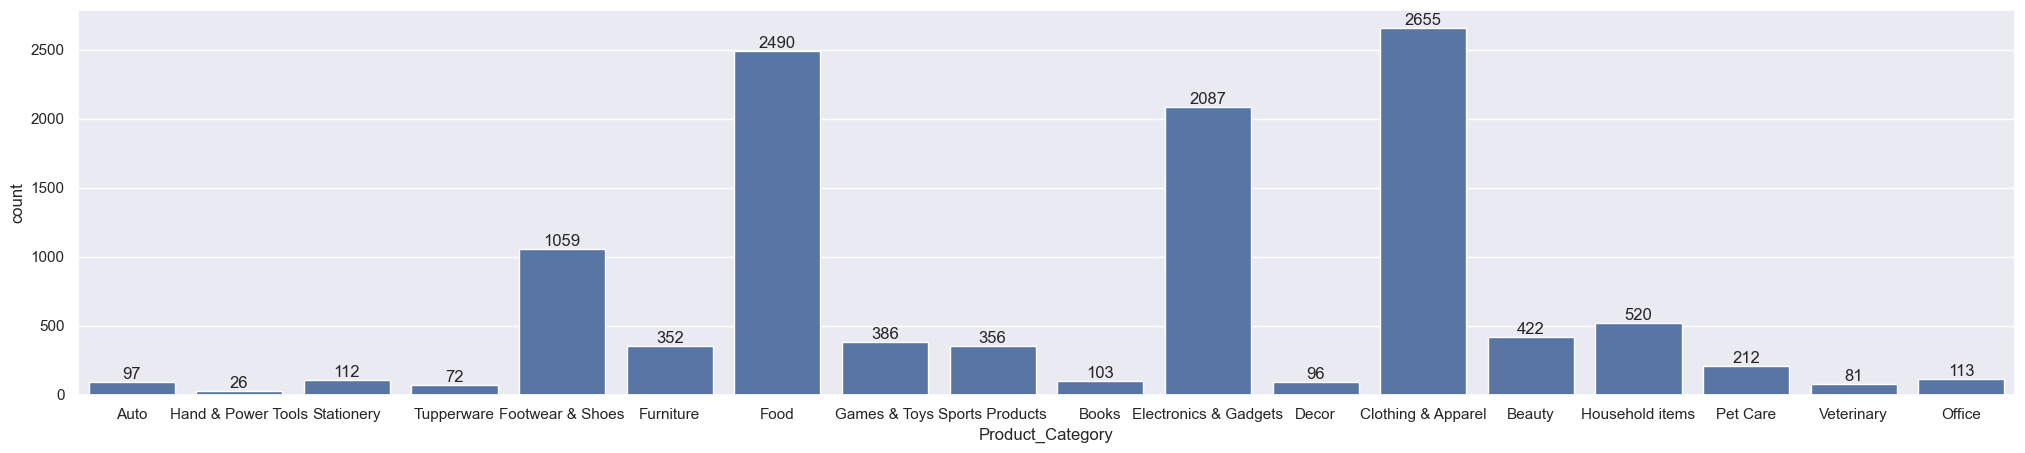

In [333]:
sns.set({"figure.figsize":(25,5)})
pr = sns.countplot(x="Product_Category", data=df)
for bars in pr.containers:
    pr.bar_label(bars)
plt.show()

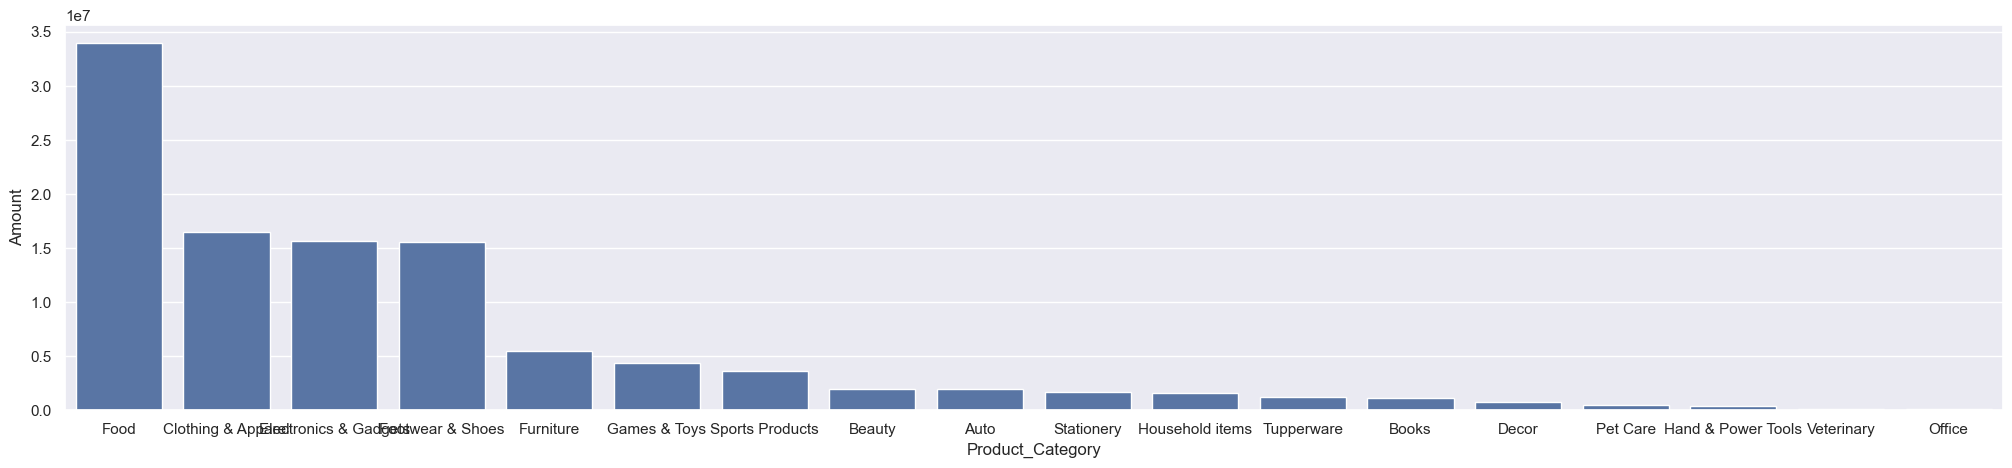

In [335]:
pa = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(x="Product_Category", y="Amount", data=pa)
plt.show()

From above graphs we can see that most of the sold products are from Food,Clothing and Electronics & Gadgets

CONCLUSION 

Married women of age group 26-35 years from UP, Maharashtra and Karnatka working in IT, Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics Gadgets 